In [1]:
import numpy as np

np.random.seed(20) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 10).T
assert class1_sample.shape == (3,10), "The matrix has not the dimensions 3x10"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 10).T
assert class2_sample.shape == (3,10), "The matrix has not the dimensions 3x10"

In [2]:
print(class1_sample)
print(class2_sample)

[[ 0.88389311 -2.34326191  0.93946935  0.40641447 -0.79201679  0.24571517
   1.05110868 -3.18970279 -0.24333877  1.55618644]
 [ 0.19586502 -1.08483259 -0.97848104  0.32346101 -0.84236793 -0.0441948
   0.40636843  1.12013226 -0.13003071  0.12877835]
 [ 0.35753652  0.55969629  0.50309684 -0.49341088 -1.27950266  1.56763255
  -0.1686461   1.33277821 -0.10901737 -2.06694872]]
[[ 0.11450685  3.059838    1.52706972 -0.13652654  0.39769198  1.59321721
   2.20451128 -1.70436525  1.85709382  2.50339816]
 [-0.10457948  0.06506204 -0.55110074  0.6615094   2.54472836  1.4380245
   2.35179619  0.4448142   2.48114365 -0.48238505]
 [ 1.93286635 -0.61299022  1.32961334  1.32097078  1.64703408  2.35778902
   1.49343724  1.00150856  0.78033888  0.14383578]]


Populating the interactive namespace from numpy and matplotlib


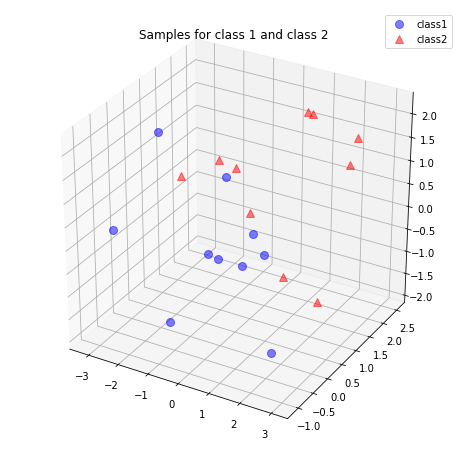

In [3]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,20), "The matrix has not the dimensions 3x20"

In [6]:
print(all_samples[0])
print(all_samples[1])
print(all_samples[2])

[ 0.88389311 -2.34326191  0.93946935  0.40641447 -0.79201679  0.24571517
  1.05110868 -3.18970279 -0.24333877  1.55618644  0.11450685  3.059838
  1.52706972 -0.13652654  0.39769198  1.59321721  2.20451128 -1.70436525
  1.85709382  2.50339816]
[ 0.19586502 -1.08483259 -0.97848104  0.32346101 -0.84236793 -0.0441948
  0.40636843  1.12013226 -0.13003071  0.12877835 -0.10457948  0.06506204
 -0.55110074  0.6615094   2.54472836  1.4380245   2.35179619  0.4448142
  2.48114365 -0.48238505]
[ 0.35753652  0.55969629  0.50309684 -0.49341088 -1.27950266  1.56763255
 -0.1686461   1.33277821 -0.10901737 -2.06694872  1.93286635 -0.61299022
  1.32961334  1.32097078  1.64703408  2.35778902  1.49343724  1.00150856
  0.78033888  0.14383578]


In [7]:
mean_x = np.mean(all_samples[0])
mean_y = np.mean(all_samples[1])
mean_z = np.mean(all_samples[2])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.49654511]
 [ 0.39718555]
 [ 0.57988092]]


In [8]:
scatter_matrix = np.zeros((3,3))
scatter_matrix

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [9]:
all_samples.shape[1]

20

In [10]:
all_samples[:,2]

array([ 0.93946935, -0.97848104,  0.50309684])

In [11]:
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 48.73974019   6.11044415  -4.70017317]
 [  6.11044415  22.70461773   9.69082898]
 [ -4.70017317   9.69082898  24.15536201]]


In [12]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 2.56524948  0.32160232 -0.24737754]
 [ 0.32160232  1.19497988  0.51004363]
 [-0.24737754  0.51004363  1.27133484]]


Computing eigenvectors and corresponding eigenvalues

In [14]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

print(eig_val_sc)
print(40*'-')
print(eig_vec_sc)
print(80*'-')
print(eig_val_cov)
print(40*'-')
print(eig_vec_cov)

[ 50.37620223  12.10268967  33.12082805]
----------------------------------------
[[ 0.97798084  0.2051906  -0.03808273]
 [ 0.17754395 -0.72212231  0.66859369]
 [-0.10968875  0.66063317  0.74265213]]
--------------------------------------------------------------------------------
[ 2.65137906  0.63698367  1.74320148]
----------------------------------------
[[ 0.97798084  0.2051906  -0.03808273]
 [ 0.17754395 -0.72212231  0.66859369]
 [-0.10968875  0.66063317  0.74265213]]


In [15]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')


Eigenvector 1: 
[[ 0.97798084]
 [ 0.17754395]
 [-0.10968875]]
Eigenvalue 1 from scatter matrix: 50.37620222651723
Eigenvalue 1 from covariance matrix: 2.651379064553538
Scaling factor:  19.0
----------------------------------------
Eigenvector 2: 
[[ 0.2051906 ]
 [-0.72212231]
 [ 0.66063317]]
Eigenvalue 2 from scatter matrix: 12.102689668784286
Eigenvalue 2 from covariance matrix: 0.6369836667781201
Scaling factor:  19.0
----------------------------------------
Eigenvector 3: 
[[-0.03808273]
 [ 0.66859369]
 [ 0.74265213]]
Eigenvalue 3 from scatter matrix: 33.12082804582745
Eigenvalue 3 from covariance matrix: 1.7432014760961818
Scaling factor:  19.0
----------------------------------------


### Checking the eigenvector-eigenvalue calculation

Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

Σv=λv

where

Σ=Covariancematrix

v=Eigenvector

λ=Eigenvalue

In [28]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(3,1)
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,decimal=6, err_msg='', verbose=True)

### Visualizing the eigenvectors

And before we move on to the next step, just to satisfy our own curiosity, we plot the eigenvectors centered at the sample mean.

Populating the interactive namespace from numpy and matplotlib


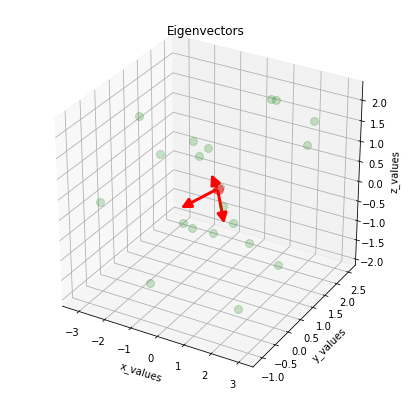

In [37]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

### Sorting the eigenvectors by decreasing eigenvalues
We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [38]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors
    print(np.linalg.norm(ev))

1.0
1.0
1.0


In [41]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
eig_pairs

[(50.376202226517229, array([ 0.97798084,  0.17754395, -0.10968875])),
 (12.102689668784286, array([ 0.2051906 , -0.72212231,  0.66063317])),
 (33.120828045827452, array([-0.03808273,  0.66859369,  0.74265213]))]

In [42]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(50.376202226517229, array([ 0.97798084,  0.17754395, -0.10968875])),
 (33.120828045827452, array([-0.03808273,  0.66859369,  0.74265213])),
 (12.102689668784286, array([ 0.2051906 , -0.72212231,  0.66063317]))]

### Choosing k eigenvectors with the largest eigenvalues

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [43]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.97798084 -0.03808273]
 [ 0.17754395  0.66859369]
 [-0.10968875  0.74265213]]


### Transforming the samples onto the new subspace
In the last step, we use the 2×3-dimensional matrix W that we just computed to transform our samples onto the new subspace via the equation y=$W^T$×x.

In [54]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,20), "The matrix is not 2x20 dimensional."
print('Actual marix: \n{}\n'.format(all_samples))
print('Matrix W: \n{}\n'.format(matrix_w))

print('Trnasformed new matrix: \n{}\n'.format(transformed))

Actual marix: 
[[ 0.88389311 -2.34326191  0.93946935  0.40641447 -0.79201679  0.24571517
   1.05110868 -3.18970279 -0.24333877  1.55618644  0.11450685  3.059838
   1.52706972 -0.13652654  0.39769198  1.59321721  2.20451128 -1.70436525
   1.85709382  2.50339816]
 [ 0.19586502 -1.08483259 -0.97848104  0.32346101 -0.84236793 -0.0441948
   0.40636843  1.12013226 -0.13003071  0.12877835 -0.10457948  0.06506204
  -0.55110074  0.6615094   2.54472836  1.4380245   2.35179619  0.4448142
   2.48114365 -0.48238505]
 [ 0.35753652  0.55969629  0.50309684 -0.49341088 -1.27950266  1.56763255
  -0.1686461   1.33277821 -0.10901737 -2.06694872  1.93286635 -0.61299022
   1.32961334  1.32097078  1.64703408  2.35778902  1.49343724  1.00150856
   0.78033888  0.14383578]]

Matrix W: 
[[ 0.97798084 -0.03808273]
 [ 0.17754395  0.66859369]
 [-0.10968875  0.74265213]]

Trnasformed new matrix: 
[[ 0.85998744 -2.5456631   0.68987557  0.50901573 -0.78378752  0.06050655
   1.11861098 -3.06678629 -0.24910884  1.771505

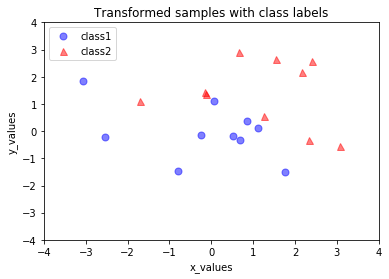

In [57]:
plt.plot(transformed[0,0:10], transformed[1,0:10], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,10:20], transformed[1,10:20], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


### Using the PCA() class from the sklearn.decomposition library to confirm our results

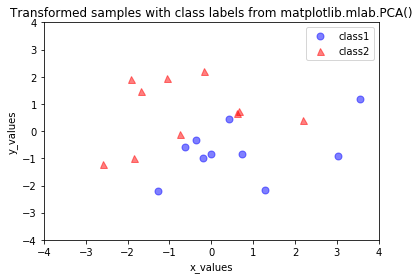

In [70]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:10,0],sklearn_transf[0:10,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[10:20,0], sklearn_transf[10:20,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [73]:
print(sklearn_transf.T)
print(transformed)

[[ 0.36746436 -3.03818617  0.19735249  0.01649265 -1.2763106  -0.43201653
   0.62608791 -3.55930937 -0.74163192  1.27898229 -0.61111873  2.57872937
   0.75723362 -0.65349207  0.16755206  1.06230244  1.91718062 -2.19023979
   1.67859673  1.85433064]
 [ 0.31447745  0.89771054  0.99365362  0.84294179  2.16056087 -0.44800402
   0.57087487 -1.18288074  0.83592846  2.18548307 -0.68386963  1.20556116
   0.11647303 -0.75120631 -2.23212173 -1.97450132 -1.92025086 -0.42878354
  -1.49037835  0.98833164]]
[[ 0.85998744 -2.5456631   0.68987557  0.50901573 -0.78378752  0.06050655
   1.11861098 -3.06678629 -0.24910884  1.77150537 -0.11859565  3.07125244
   1.2497567  -0.16096899  0.66007514  1.55482552  2.4097037  -1.69771671
   2.17111981  2.34685372]
 [ 0.36281831 -0.22041478 -0.31635786 -0.16564603 -1.4832651   1.12529979
   0.10642089  1.86017651 -0.15863269 -1.5081873   1.3611654  -0.52826539
   0.56082273  1.42850208  2.90941749  2.65179708  2.59754663  1.10607931
   2.16767411 -0.31103587]]


The plot above seems to be the exact mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1) to revert the mirror image.

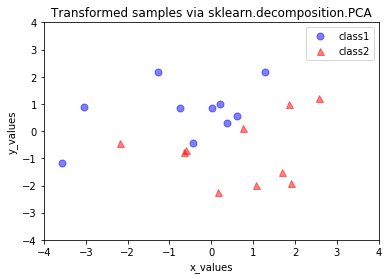

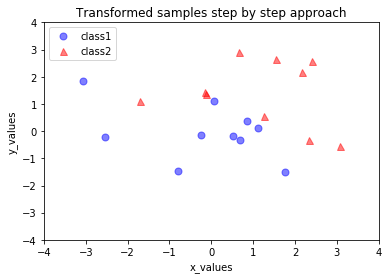

In [72]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:10,0],sklearn_transf[0:10,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[10:20,0], sklearn_transf[10:20,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:10], transformed[1,0:10], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,10:20], transformed[1,10:20], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()